# 5. Modelado de datos

## 5.1. Introducción

Ya hemos visto algunas técnicas cualitativas. Veamos brevemente un resumen de las técnicas cuantitativas que podemos utilizar para entender los datos:

<p align="left">
  <img src="https://www.datocms-assets.com/42764/1664970413-chart-selection-diagram.png" alt="" style="background-color:white"/> <br>
</p>

Tomado de: [Choosing a good chart](https://extremepresentation.typepad.com/blog/2006/09/choosing_a_good.html).



Si bien, las técnicas revisadas nos dan un importante entendimiento de los datos, no son suficientes para poder realizar un análisis más profundo. Para ello, es necesario realizar un proceso de modelado. El modelado de datos es un proceso de análisis de datos que busca descubrir patrones y relaciones entre variables. El modelado de datos es una parte fundamental del análisis de datos y es la base para la construcción de modelos de aprendizaje automático (machine learning).

Primero, entendamos en que campo del conocimiento se encuentra el modelado de datos. El modelado de datos es un proceso que se encuentra en el campo de la estadística. La estadística es una rama de las matemáticas que se encarga de recolectar, organizar, analizar e interpretar datos. Sin embargo, en épocas más recientes se ha desarrollado un campo de conocimiento que se encarga de realizar análisis de datos a gran escala. Este campo de conocimiento es el análisis de datos (data analytics). El cual es un proceso que se encarga de recolectar, organizar, analizar e interpretar datos a gran escala. El análisis de datos es un proceso que se encuentra en el campo de la ciencia de datos (data science). La ciencia de datos es un campo de conocimiento que se encarga de recolectar, organizar, analizar e interpretar datos a gran escala utilizando técnicas de estadística, matemáticas, programación y visualización de datos.

<p align="left">
  <img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*mgXvzNcwfpnBawI6XTkVRg.png" alt=""  width="400"/> <br>
</p>

Tomado de: [Medium](https://senendu5.medium.com/getting-into-data-science-687731828bb).


¿Qué es un modelo?

Un modelo es una forma de representar la realidad. También se suele decir que un modelo es una abstracción de la realidad, una representación simplificada de la realidad o una representación de la realidad que nos permite entenderla mejor y predecir lo que pasará.


<p align="left">
  <img src="https://www.lacan.upc.edu/admoreWeb/wp-content/uploads/2018/04/test2.jpg" alt=""  width="400" /> <br>
</p>



### Algunos ejemplos de modelos.

Uno de los modelos más simples que podemos encontrar es el del tiro parabólico:

<p align="left">
  <img src="https://www.neurochispas.com/wp-content/uploads/2023/06/Formula-para-el-rango-en-movimiento-parabolico.png" alt=""  width="400" /> <br>
</p>

Si ponemos algunas de estas variables en un modelo matemático, obtenemos la siguiente ecuación:

$$y = ax^2 + bx + c$$

- Donde $y$ es la altura, $x$ es la distancia y $a$, $b$ y $c$ son constantes.
- En éste caso, tanto $x$ como $y$ se les conoce como variables y $a$, $b$ y $c$ como parámetros.
- Éste tipo de modelos se los conoce como modelos matemáticos.

Por otro lado, tenemos modelos estocásticos o estadísticos. Un clásico ejemplo es el modelo de regresión lineal:

(Por ahora no nos preocupemos por el código)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
# label encoder
from sklearn.preprocessing import LabelEncoder

sns.set()

In [2]:
# leer datos
df = pd.read_csv('https://raw.githubusercontent.com/alejo-acosta/pmdb-material/master/data/house-train.csv')

# variables categóricas y numéricas
cat_vars = [i for i in df.columns if i not in df._get_numeric_data().columns]
num_vars = [i for i in df.columns if i not in cat_vars]

# eliminar outliers
lista_variables_outliers = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',]
df = df[(np.abs(stats.zscore(df[lista_variables_outliers])) < 3).all(axis=1)]

# encode categorical variables
le = LabelEncoder()

for col in cat_vars:
    df[col] = le.fit_transform(df[col])


df.shape

(1420, 81)

In [3]:
df.corr(numeric_only=True)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.009621,-0.001416,-0.021551,-0.038818,0.019330,-0.001433,0.031911,-0.020868,0.013423,...,0.058125,-0.051766,-0.001234,0.040920,-0.007117,0.026235,0.001594,0.020736,-0.006055,-0.028339
MSSubClass,0.009621,1.000000,0.036947,-0.416096,-0.149659,-0.034992,-0.101097,0.117471,0.009831,-0.023188,...,0.003860,0.004405,0.090871,0.033986,-0.007569,-0.011168,-0.016375,0.007598,-0.011793,-0.083061
MSZoning,-0.001416,0.036947,1.000000,-0.114470,-0.034416,0.040414,-0.054727,0.066364,-0.027836,-0.001298,...,-0.002575,0.002464,-0.057481,-0.015207,0.012836,-0.031374,-0.020021,0.089032,0.006581,-0.212408
LotFrontage,-0.021551,-0.416096,-0.114470,1.000000,0.388814,-0.019488,0.139183,-0.177431,-0.056067,NaN,...,0.019435,-0.019777,-0.037583,-0.003718,0.003201,0.030580,0.012295,-0.013908,0.069487,0.359398
LotArea,-0.038818,-0.149659,-0.034416,0.388814,1.000000,-0.214312,0.056462,-0.162199,-0.126487,0.011010,...,0.021404,-0.018334,0.035633,-0.109083,0.040562,0.012069,-0.011880,0.021816,0.026842,0.258683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,0.026235,-0.011168,-0.031374,0.030580,0.012069,0.012011,0.013285,-0.032363,-0.014342,-0.052601,...,-0.012007,0.022023,-0.010045,-0.010731,-0.007846,1.000000,-0.149396,-0.046056,0.012097,0.082498
YrSold,0.001594,-0.016375,-0.020021,0.012295,-0.011880,-0.026090,0.020408,0.036350,0.017417,0.023640,...,-0.053643,0.056297,-0.042383,-0.056532,0.004789,-0.149396,1.000000,-0.002831,-0.001401,-0.029777
SaleType,0.020736,0.007598,0.089032,-0.013908,0.021816,-0.017972,0.011500,-0.004176,-0.031042,-0.128465,...,0.015930,-0.015242,0.001646,-0.011383,0.017293,-0.046056,-0.002831,1.000000,0.205855,-0.034284
SaleCondition,-0.006055,-0.011793,0.006581,0.069487,0.026842,0.008811,0.028542,-0.033501,0.029649,-0.091393,...,-0.017209,0.004397,0.088315,0.002505,0.013837,0.012097,-0.001401,0.205855,1.000000,0.233021


In [4]:
corr = df[num_vars].corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)
corr = corr.style.background_gradient(cmap='coolwarm')
corr


,SalePrice
SalePrice,1.000000
OverallQual,0.799280
GrLivArea,0.691209
GarageCars,0.652158
GarageArea,0.639583
TotalBsmtSF,0.617726
1stFlrSF,0.582620
YearBuilt,0.573975
FullBath,0.546787
YearRemodAdd,0.536000


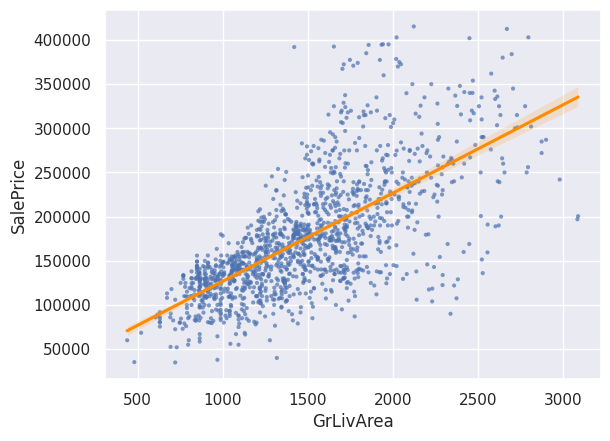

In [5]:
sns.regplot(x='GrLivArea', y='SalePrice', data=df, scatter_kws={'alpha':0.7, 'edgecolor':'none'}, marker='.', line_kws={'color':'darkorange'})
plt.show()

No podemos predecir con exactitud el valor de $y$ a partir de $x$, pero podemos predecir un intervalo de valores en los que se encontrará $y$ con cierta probabilidad. Por ejemplo, podemos decir que con un 95% de probabilidad, dado un valor determinado de $x=1000$, $y$ se encontrará entre $75000 y $125000.

El gráfico es una representación cualitativa del modelo, pero el modelo en sí tomaría la forma de la siguiente ecuación:

$$y = ax + b$$

Donde $y$ es el precio de la vivienda en dólares, $x$ es el área de construcción en pies cuadrados y $a$ y $b$ son las constantes o parámetros del modelo.

<!-- question box -->
<div class="alert alert-block alert-info">
    <b>Pregunta:</b> ¿Cómo se puede interpretar el parámetro a? ¿Cómo se puede interpretar el parámetro b?
</div>

Revisar: https://www.geogebra.org/calculator/pz34cwqh

## 5.2. Modelos de regresión lineal

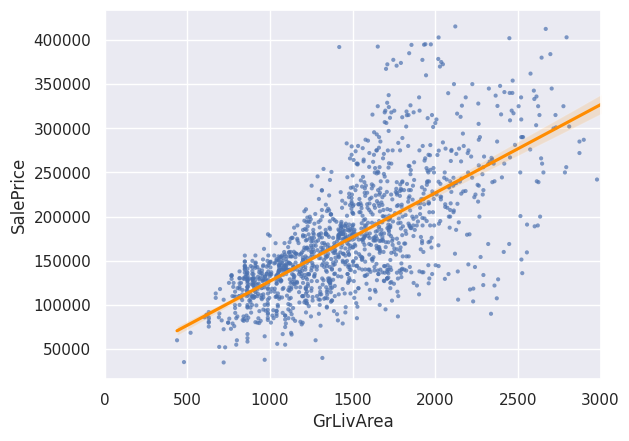

In [6]:
sns.regplot(x='GrLivArea', y='SalePrice', data=df, scatter_kws={'alpha':0.7, 'edgecolor':'none'}, marker='.', line_kws={'color':'darkorange'})
plt.xlim(0, 3000)
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y = df['SalePrice']
X = df[['GrLivArea']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = LinearRegression()

lr.fit(X_train, y_train)

print('Intercept: ', lr.intercept_)
print('Coef: ', lr.coef_)


Intercept:  27344.50493720136
Coef:  [99.50647065]


$Precio = 100.76 [\frac{USD}{Área}] * Metros\_cuadrados [Área] + 2690.97[USD]$

<!-- question box -->
<div class="alert alert-block alert-info">
    <b>Pregunta:</b> ¿En promedio, cuánto costaría una vivienda de 2000 pies cuadrados?
</div>

La regresión lineal, no necesariamente tiene que tener una sola variable independiente. Puede tener más de una variable independiente. Por ejemplo, podemos tener un modelo de regresión lineal con dos variables independientes:

$$y = ax_1 + bx_2 + c$$

Además, las variables independiente pueden tener ciertas transformaciones. Por ejemplo, podemos tener un modelo de regresión lineal con una variable independiente que es el cuadrado de otra variable independiente:

$$y = ax_1^2 + bx_1 + cx_2 + d$$

<p align="left">
  <img src="https://taxfoundation.org/wp-content/uploads/2019/03/PaF-Chart-121.png" alt="" style="background-color:white"  width="700"/> <br>
</p>

Tomado de: [Tax Foundation](https://taxfoundation.org/data/all/federal/average-income-age/).

> ¿Qué ecuación matemática podría representar el gráfico anterior?

In [8]:
x = np.linspace(0, 20, 19)
def func(x):
    return x*np.sin(x)+x
y = func(x)

def plot_order(order=1, fit_reg=False, extended=False):
    import warnings
    params = {'scatter_kws':{'alpha':1, 'edgecolor':'none'}, 
              'marker':'o', 'line_kws':{'color':'darkorange'}, 
              'ci':0, 'x':x, 'y':y}
    warnings.filterwarnings('ignore')
    fit = np.polyfit(x, y, order)
    fit_fn = np.poly1d(fit)
    if extended: xline = np.linspace(-5,25,100)
    else:        xline = np.linspace(0,20,100)
    fig = plt.figure(figsize=(8, 5))
    if fit_reg:
        plt.plot(x, y, 'bo', xline, fit_fn(xline), '--r')
    sns.regplot(order=order, **params, fit_reg=False)
    plt.axvspan(-1, 21, color='grey', alpha=0.2)
    plt.xlim(-5, 25)
    plt.ylim(-10, 50)
    plt.show()

In [9]:
from ipywidgets import interact
interact(plot_order, order=(1, 20, 1))
plt.show()

interactive(children=(IntSlider(value=1, description='order', max=20, min=1), Checkbox(value=False, descriptio…

**Overfitting:** es un problema que se presenta cuando el modelo se ajusta demasiado a los datos de entrenamiento. En otras palabras, el modelo se ajusta demasiado a los datos que tiene disponible y no generaliza bien a nuevos datos.

Revisar:
https://www.youtube.com/watch?v=EuBBz3bI-aA

## 5.2.1. Ejemplo regresión lineal

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y = df['SalePrice']
X = df[['GrLivArea']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = LinearRegression()

lr.fit(X_train, y_train)

print('Intercept: ', lr.intercept_)
print('Coef: ', lr.coef_)


Intercept:  26719.035766094807
Coef:  [99.81880999]


¿Cómo medimos si el modelo es bueno o malo?

El mapa de machine learning:
<p align="left">
  <img src="https://www.wordstream.com/wp-content/uploads/2021/07/machine-learning1-1.png" alt="" style="background-color:white"  width="1000"/> <br>
</p>

Tomado de: [Abdul Rahid](https://www.slideshare.net/awahid/big-data-and-machine-learning-for-businesses).



1. Definir el problema y mirar el panorama general.
2. Obténer los datos
3. Explorar los datos para obtener información.
4. Preparación de los datos.
5. Exploración y selección de modelos
6. Afinar los modelos.
7. Interpretabilidad del modelo.
8. Presentacion de la solución.
9. Desplegar, monitorear y mantener el sistema.
